In [19]:
!pip install pandas html5lib beautifulsoup4 numpy scikit-learn matplotlib seaborn tqdm
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [20]:
url = 'https://www.baseball-reference.com/leagues/majors/2022-standard-batting.shtml#teams_standard_batting'
result = pd.read_html(url)  # データの読み込み
print(len(result))  # 読み込みこまれたデータの数
df = result[0]  # 結果に含まれるデータを取り出す
df   # データの表示

1


,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,Arizona Diamondbacks,57,26.5,4.33,162,6027,5351,702,1232,262,24,173,658,104,29,531,1341,.230,.304,.385,.689,95,2061,97,60,31,50,14,1039
1,Atlanta Braves,53,27.5,4.87,162,6082,5509,789,1394,298,11,243,753,87,31,470,1498,.253,.317,.443,.761,109,2443,103,66,1,36,13,1030
2,Baltimore Orioles,58,27.0,4.16,162,6049,5429,674,1281,275,25,171,639,95,31,476,1390,.236,.305,.390,.695,99,2119,95,83,12,43,10,1095
3,Boston Red Sox,54,28.8,4.54,162,6144,5539,735,1427,352,12,155,704,52,20,478,1373,.258,.321,.409,.731,102,2268,131,63,12,50,23,1133
4,Chicago Cubs,64,27.9,4.06,162,6072,5425,657,1293,265,31,159,620,111,37,507,1448,.238,.311,.387,.698,94,2097,130,84,19,36,16,1100
5,Chicago White Sox,44,29.3,4.23,162,6123,5611,686,1435,272,9,149,654,58,10,388,1269,.256,.310,.387,.698,97,2172,127,73,16,35,9,1117
6,Cincinnati Reds,66,29.4,4.00,162,5978,5380,648,1264,235,18,156,618,58,33,452,1430,.235,.304,.372,.676,85,2003,127,92,12,33,6,1020
7,Cleveland Guardians,50,25.9,4.31,162,6163,5558,698,1410,273,31,127,662,119,27,450,1122,.254,.316,.383,.699,102,2126,119,81,22,52,36,1156
8,Colorado Rockies,43,29.1,4.31,162,6105,5540,698,1408,280,34,149,669,45,20,453,1330,.254,.315,.398,.713,91,2203,139,61,10,40,10,1113
9,Detroit Tigers,53,27.9,3.44,162,5870,5378,557,1240,235,27,110,530,47,24,380,1413,.231,.286,.346,.632,82,1859,108,58,10,44,8,1015


In [21]:
# year　のデータを読み込む
def download_stat(year):
    url = f'https://www.baseball-reference.com/leagues/majors/{year}-standard-batting.shtml#teams_standard_batting'
    result = pd.read_html(url)

    return result[0]

# start_year から end_year までのデータを取得し、各年で CSV を保存する
def main():
    start_year = 2013
    end_year = 2023
    data_dir = '/content'

    for year in tqdm(range(start_year, end_year+1)):
        stat = download_stat(year)
        name = f'leagues-standard-batting-{year}.csv'
        stat.to_csv(os.path.join(data_dir, name), index=None)

main()

  0%|          | 0/11 [00:00<?, ?it/s]

In [22]:
def read_stat(year, data_dir):
    name = f'leagues-standard-batting-{year}.csv'
    stat = pd.read_csv(os.path.join(data_dir, name))
    return stat

read_stat(2023, '/content')

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,Arizona Diamondbacks,54,27.4,4.60,162,6124,5436,746,1359,274,44,166,706,166,26,540,1247,.250,.322,.408,.730,99,2219,121,58,36,50,11,1091
1,Atlanta Braves,53,27.9,5.85,162,6249,5597,947,1543,293,23,307,916,132,27,538,1289,.276,.344,.501,.845,125,2803,128,67,2,43,20,1062
2,Baltimore Orioles,50,27.2,4.98,162,6123,5495,807,1399,309,28,183,780,114,24,512,1370,.255,.321,.421,.742,107,2313,114,45,21,47,14,1041
3,Boston Red Sox,56,28.6,4.77,162,6174,5562,772,1437,339,19,182,734,112,26,486,1372,.258,.324,.424,.748,100,2360,118,71,11,35,15,1117
4,Chicago Cubs,48,28.4,5.06,162,6220,5504,819,1399,269,30,196,786,140,34,570,1391,.254,.330,.421,.751,102,2316,95,77,15,52,11,1127
5,Chicago White Sox,56,27.8,3.96,162,5980,5501,641,1308,264,13,171,617,86,22,377,1424,.238,.291,.384,.675,84,2111,122,52,16,29,19,1009
6,Cincinnati Reds,65,26.8,4.83,162,6195,5499,783,1371,268,37,198,747,190,48,556,1500,.249,.327,.420,.746,99,2307,101,92,19,29,8,1107
7,Cleveland Guardians,50,26.6,4.09,162,6096,5513,662,1379,294,29,124,622,151,36,471,1142,.250,.313,.381,.695,92,2103,108,55,13,44,40,1121
8,Colorado Rockies,57,28.1,4.45,162,6055,5496,721,1368,305,31,163,685,76,25,447,1543,.249,.310,.405,.715,85,2224,124,59,11,41,8,1038
9,Detroit Tigers,51,27.4,4.08,162,6080,5478,661,1292,245,29,165,635,85,23,508,1473,.236,.305,.382,.686,88,2090,107,49,13,31,10,1103


In [23]:
# 指定した年の範囲のデータを読み込み、1つのDataFrameにまとめる
def read_stat_all(start_year, end_year, data_dir):
    list_stat = []

    for year in tqdm(range(start_year, end_year+1)):
        stat = read_stat(year, data_dir)
        stat['year'] = year
        list_stat.append(stat)

    return pd.concat(list_stat)

start_year = 2013
end_year = 2023
data_dir = '/content'

stat_all = read_stat_all(start_year, end_year, data_dir)    # 全データを読み込む
stat_all['Tm'].value_counts()

  0%|          | 0/11 [00:00<?, ?it/s]

Tm
Arizona Diamondbacks             11
Atlanta Braves                   11
Tm                               11
League Average                   11
Washington Nationals             11
Toronto Blue Jays                11
Texas Rangers                    11
Tampa Bay Rays                   11
St. Louis Cardinals              11
San Francisco Giants             11
Seattle Mariners                 11
San Diego Padres                 11
Pittsburgh Pirates               11
Philadelphia Phillies            11
Oakland Athletics                11
New York Yankees                 11
New York Mets                    11
Minnesota Twins                  11
Milwaukee Brewers                11
Baltimore Orioles                11
Boston Red Sox                   11
Chicago Cubs                     11
Chicago White Sox                11
Cincinnati Reds                  11
Colorado Rockies                 11
Detroit Tigers                   11
Houston Astros                   11
Kansas City Royals       

In [24]:
def reshape_team_name(stat_all):
    dict_team_name_replace = {
        'Cleveland Indians':'Cleveland Guardians',
        'Florida Marlins': 'Miami Marlins',
        'Los Angeles Angels of Anaheim': 'Los Angeles Angels',
    }

    list_team_name_delete = [np.nan, 'Tm', 'League Average']

    stat_all = stat_all[~stat_all['Tm'].isin(list_team_name_delete)]    # 行の削除
    stat_all = stat_all.replace({'Tm': dict_team_name_replace})     # チーム名を統一

    return stat_all

stat_all = reshape_team_name(stat_all)
print(stat_all['Tm'].value_counts())

Tm
Arizona Diamondbacks     11
Atlanta Braves           11
Toronto Blue Jays        11
Texas Rangers            11
Tampa Bay Rays           11
St. Louis Cardinals      11
San Francisco Giants     11
Seattle Mariners         11
San Diego Padres         11
Pittsburgh Pirates       11
Philadelphia Phillies    11
Oakland Athletics        11
New York Yankees         11
New York Mets            11
Minnesota Twins          11
Milwaukee Brewers        11
Miami Marlins            11
Los Angeles Dodgers      11
Los Angeles Angels       11
Kansas City Royals       11
Houston Astros           11
Detroit Tigers           11
Colorado Rockies         11
Cleveland Guardians      11
Cincinnati Reds          11
Chicago White Sox        11
Chicago Cubs             11
Boston Red Sox           11
Baltimore Orioles        11
Washington Nationals     11
Name: count, dtype: int64


In [25]:
#objectからfloat
for target in stat_all.columns[1:29].values:
  stat_all[target] = pd.to_numeric(stat_all[target])

In [26]:
pd.set_option('display.max_columns', None)
stat_all

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,year
0,Arizona Diamondbacks,44,28.1,4.23,162,6334,5676,685,1468,302,31,130,647,62,41,519,1142,0.259,0.323,0.391,0.715,96,2222,160,43,50,43,51,1160,2013
1,Atlanta Braves,44,26.8,4.25,162,6133,5441,688,1354,247,21,181,656,64,31,542,1384,0.249,0.321,0.402,0.723,99,2186,119,55,58,35,36,1132,2013
2,Baltimore Orioles,52,27.8,4.60,162,6144,5620,745,1460,298,14,212,719,79,29,416,1125,0.260,0.313,0.431,0.744,101,2422,105,36,27,45,36,1053,2013
3,Boston Red Sox,48,29.6,5.27,162,6382,5651,853,1566,363,29,178,819,123,19,581,1308,0.277,0.349,0.446,0.795,116,2521,137,72,24,50,51,1212,2013
4,Chicago Cubs,56,27.9,3.72,162,6079,5498,602,1307,297,18,172,576,63,32,439,1230,0.238,0.300,0.392,0.693,89,2156,120,67,43,30,28,1092,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,St. Louis Cardinals,52,27.5,4.44,162,6204,5510,719,1376,264,12,209,697,101,29,570,1326,0.250,0.326,0.416,0.742,101,2291,122,70,13,37,17,1183,2023
26,Tampa Bay Rays,58,26.8,5.31,162,6164,5511,860,1432,282,24,230,827,160,41,514,1420,0.260,0.331,0.445,0.776,115,2452,109,95,6,38,7,1047,2023
27,Texas Rangers,48,28.3,5.44,162,6306,5595,881,1470,326,18,233,845,79,19,599,1416,0.263,0.337,0.452,0.790,116,2531,103,53,10,47,17,1164,2023
28,Toronto Blue Jays,46,28.8,4.60,162,6220,5562,746,1423,292,19,188,705,99,34,550,1303,0.256,0.329,0.417,0.745,105,2317,129,69,4,32,14,1170,2023


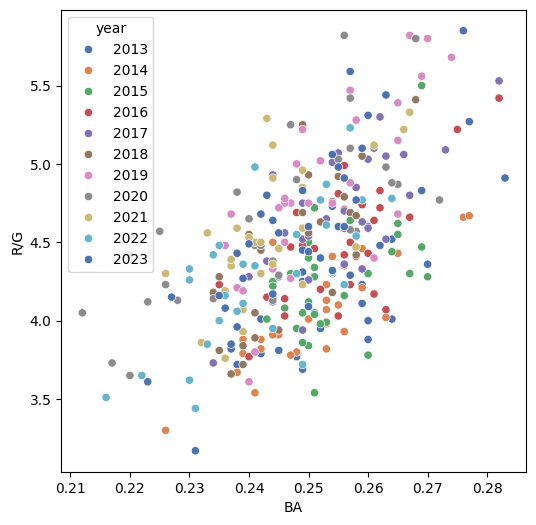

In [27]:
def main(data, target):
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.scatterplot(data=data, x=target, y='R/G', hue='year',
                     ax=ax,palette='deep')

    plt.show()

main(stat_all, 'BA')

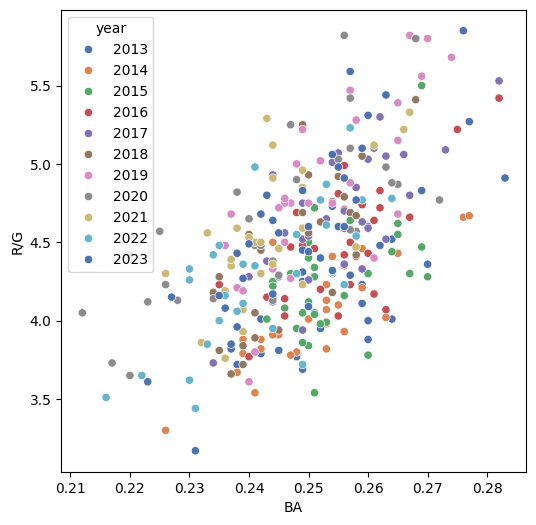

In [28]:
main(stat_all, 'BA')

In [29]:
df = stat_all.drop(['Tm','G','R','#Bat','BatAge','OBP','SLG'],axis=1)
df

,R/G,PA,AB,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,year
0,4.23,6334,5676,1468,302,31,130,647,62,41,519,1142,0.259,0.715,96,2222,160,43,50,43,51,1160,2013
1,4.25,6133,5441,1354,247,21,181,656,64,31,542,1384,0.249,0.723,99,2186,119,55,58,35,36,1132,2013
2,4.60,6144,5620,1460,298,14,212,719,79,29,416,1125,0.260,0.744,101,2422,105,36,27,45,36,1053,2013
3,5.27,6382,5651,1566,363,29,178,819,123,19,581,1308,0.277,0.795,116,2521,137,72,24,50,51,1212,2013
4,3.72,6079,5498,1307,297,18,172,576,63,32,439,1230,0.238,0.693,89,2156,120,67,43,30,28,1092,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,4.44,6204,5510,1376,264,12,209,697,101,29,570,1326,0.250,0.742,101,2291,122,70,13,37,17,1183,2023
26,5.31,6164,5511,1432,282,24,230,827,160,41,514,1420,0.260,0.776,115,2452,109,95,6,38,7,1047,2023
27,5.44,6306,5595,1470,326,18,233,845,79,19,599,1416,0.263,0.790,116,2531,103,53,10,47,17,1164,2023
28,4.60,6220,5562,1423,292,19,188,705,99,34,550,1303,0.256,0.745,105,2317,129,69,4,32,14,1170,2023


In [30]:
df.corr().style.background_gradient(axis=None)

,R/G,PA,AB,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,year
R/G,1.000000,-0.061557,-0.090442,0.043052,0.146811,-0.133319,0.507126,0.402474,-0.069259,-0.269307,0.233497,-0.093920,0.578889,0.936466,0.750177,0.207788,-0.111711,0.109516,-0.321560,0.106055,0.013790,-0.058832,0.261071
PA,-0.061557,1.000000,0.998105,0.973045,0.913123,0.526083,0.648000,0.880502,0.498462,0.570494,0.840346,0.876234,0.199761,-0.018916,-0.023748,0.950379,0.824740,0.533459,0.408140,0.735279,0.481622,0.983478,-0.212983
AB,-0.090442,0.998105,1.000000,0.975339,0.910674,0.536712,0.628263,0.865581,0.498029,0.578920,0.807299,0.871418,0.202806,-0.044690,-0.046829,0.945381,0.827575,0.510928,0.408185,0.725477,0.469457,0.976656,-0.225200
H,0.043052,0.973045,0.975339,1.000000,0.940820,0.557392,0.635919,0.901628,0.481556,0.566582,0.781620,0.787955,0.405587,0.110395,0.078382,0.967807,0.844259,0.464236,0.416315,0.749578,0.516649,0.960433,-0.277146
2B,0.146811,0.913123,0.910674,0.940820,1.000000,0.496181,0.620356,0.894898,0.420318,0.489469,0.784662,0.743200,0.408447,0.188569,0.145422,0.931627,0.760081,0.440470,0.323400,0.736773,0.483941,0.904956,-0.209040
3B,-0.133319,0.526083,0.536712,0.557392,0.496181,1.000000,0.111434,0.398963,0.429107,0.539952,0.315802,0.422301,0.247351,-0.074388,-0.185729,0.486378,0.400054,0.118910,0.471222,0.416327,0.433554,0.518794,-0.305510
HR,0.507126,0.648000,0.628263,0.635919,0.620356,0.111434,1.000000,0.852454,0.232303,0.171889,0.748142,0.687707,0.229071,0.536799,0.370274,0.805118,0.446837,0.494599,-0.045624,0.452662,0.186117,0.597941,0.143340
RBI,0.402474,0.880502,0.865581,0.901628,0.894898,0.398963,0.852454,1.000000,0.418806,0.383476,0.872780,0.765915,0.418556,0.405465,0.306251,0.966700,0.690499,0.546204,0.193502,0.719947,0.414311,0.858871,-0.032623
SB,-0.069259,0.498462,0.498029,0.481556,0.420318,0.429107,0.232303,0.418806,1.000000,0.658028,0.395659,0.433040,0.081719,-0.087704,-0.074118,0.444517,0.325106,0.269059,0.254035,0.448951,0.183691,0.471535,-0.043816
CS,-0.269307,0.570494,0.578920,0.566582,0.489469,0.539952,0.171889,0.383476,0.658028,1.000000,0.359132,0.486327,0.119562,-0.188251,-0.180674,0.490245,0.462136,0.252589,0.472995,0.414785,0.366930,0.534650,-0.384892


In [31]:
df1 = df.drop(['AB','H','2B','3B','RBI','BB','TB','HR','PA','LOB','year','OPS','OPS+'],axis=1)
df1.corr().style.background_gradient(axis=None)

,R/G,SB,CS,SO,BA,GDP,HBP,SH,SF,IBB
R/G,1.000000,-0.069259,-0.269307,-0.093920,0.578889,-0.111711,0.109516,-0.321560,0.106055,0.013790
SB,-0.069259,1.000000,0.658028,0.433040,0.081719,0.325106,0.269059,0.254035,0.448951,0.183691
CS,-0.269307,0.658028,1.000000,0.486327,0.119562,0.462136,0.252589,0.472995,0.414785,0.366930
SO,-0.093920,0.433040,0.486327,1.000000,-0.083021,0.614177,0.560311,0.251130,0.529244,0.291374
BA,0.578889,0.081719,0.119562,-0.083021,1.000000,0.320921,-0.044879,0.161595,0.315096,0.340870
GDP,-0.111711,0.325106,0.462136,0.614177,0.320921,1.000000,0.370572,0.382419,0.609963,0.444733
HBP,0.109516,0.269059,0.252589,0.560311,-0.044879,0.370572,1.000000,0.067104,0.356469,0.150755
SH,-0.321560,0.254035,0.472995,0.251130,0.161595,0.382419,0.067104,1.000000,0.246912,0.652115
SF,0.106055,0.448951,0.414785,0.529244,0.315096,0.609963,0.356469,0.246912,1.000000,0.373812
IBB,0.013790,0.183691,0.366930,0.291374,0.340870,0.444733,0.150755,0.652115,0.373812,1.000000


In [32]:
df_X = df.drop('R/G', axis=1)
df_y = df['R/G']

df_X = sm.add_constant(df_X)

model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                    R/G   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     849.1
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          1.59e-258
Time:                        12:20:00   Log-Likelihood:                 437.31
No. Observations:                 330   AIC:                            -830.6
Df Residuals:                     308   BIC:                            -747.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9661      4.655      2.570      0.0

In [33]:
df_X = df1.drop('R/G', axis=1)
df_y = df1['R/G']

df_X = sm.add_constant(df_X)

model = sm.OLS(df_y, df_X)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                    R/G   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     77.19
Date:                Sun, 21 Jul 2024   Prob (F-statistic):           8.04e-75
Time:                        12:20:00   Log-Likelihood:                -44.771
No. Observations:                 330   AIC:                             109.5
Df Residuals:                     320   BIC:                             147.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2354      0.399     -8.115      0.0

y= 11.967*x + -4.267
score：  0.8769690518682858


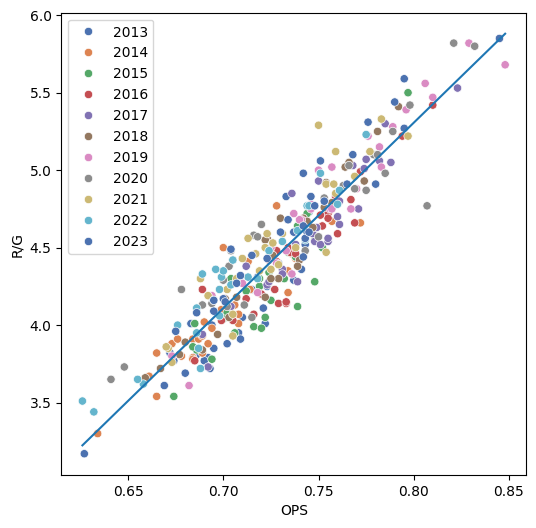

In [36]:
# 回帰モデルを計算する
def build_model(x, y):
    model = LinearRegression()
    model.fit(x, y)

    return model

# 回帰直線の式、決定係数を整形して表示する
def print_summary(model, x, y):
    print(f'y= {model.coef_[0][0]:.3f}*x + {model.intercept_[0]:.3f}')
    print('score： ', model.score(x, y))

def main(data, target,target2):
    # DataFrameから説明変数targetと得点を抽出する
    x = data[[target]]
    y = data[[target2]]

    # 回帰分析
    model = build_model(x, y)
    print_summary(model, x, y)

    pred = model.predict(x)
    # プロット
    fig, ax = plt.subplots(figsize=(6, 6))
    # 散布図
    sns.scatterplot(data=data, x=target, y=target2, hue='year',
                    ax=ax, palette='deep')
    # 回帰直線
    sns.lineplot(
        data={'x':x.values.reshape(-1), 'y':pred.reshape(-1)},
        x='x', y='y'
    )
    plt.show()

main(stat_all, 'OPS','R/G')

y= 23.958*x + -1.534
score：  0.3351127252906413


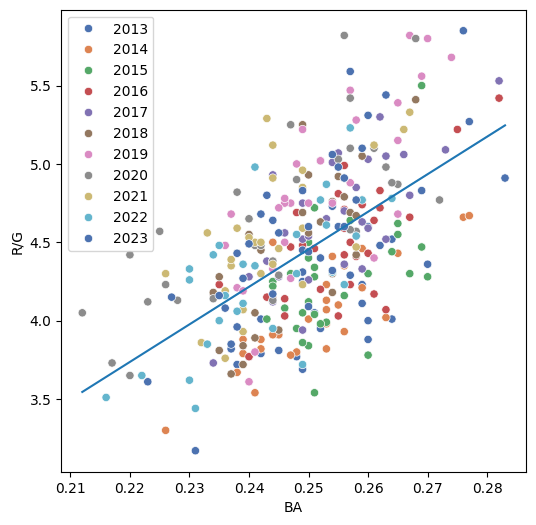

In [37]:
main(stat_all, 'BA','R/G')